In [10]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

plt.style.use('seaborn-darkgrid')
%matplotlib inline

In [12]:
wine_df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/winequality-red.csv")
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [13]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
print(wine_df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


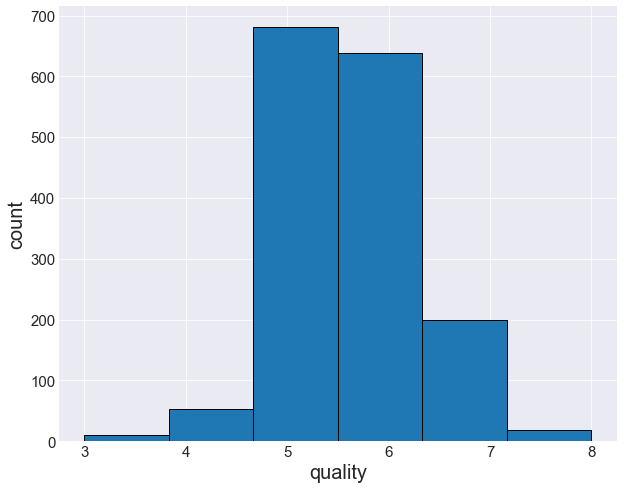

In [15]:
rcParams["figure.figsize"] = [10, 8]
plt.hist(wine_df['quality'], bins=6, edgecolor='black')
plt.xlabel('quality', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [16]:
X = wine_df.drop('quality', axis=1).values
X = StandardScaler().fit_transform(X)
y = np.ravel(wine_df[['quality']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)

In [17]:
reg = DecisionTreeRegressor(random_state=200)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred = np.array([round(y) for y in y_pred])
# Evaluating the Model
print('Accuracy:', sum(y_test == y_pred) / len(y_test == y_pred))

Accuracy: 0.6270833333333333


In [19]:
bag_reg = BaggingRegressor(random_state=200)
bag_reg = bag_reg.fit(X_train, y_train)
y_pred_bag = bag_reg.predict(X_test)
y_pred_bag = np.array([round(y) for y in y_pred_bag])

In [20]:
# Evaluating the Model
print('Accuracy:', sum(y_test == y_pred_bag) / len(y_test == y_pred_bag))

Accuracy: 0.6479166666666667


In [21]:
boost_reg = GradientBoostingRegressor(random_state=200)
boost_reg = boost_reg.fit(X_train, y_train)
y_pred_boost = boost_reg.predict(X_test)
y_pred_boost = np.array([round(y) for y in y_pred_boost])
# Evaluating the Model
print('Accuracy:', sum(y_test == y_pred_boost) / len(y_test == y_pred_boost))

Accuracy: 0.6604166666666667


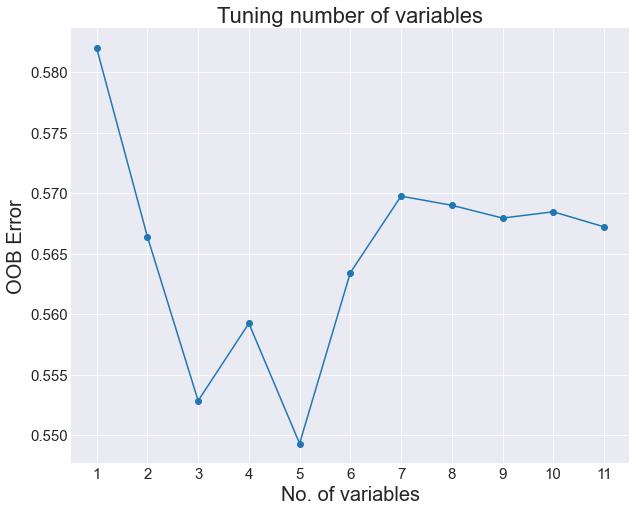

In [22]:
oob_error_mtry = []

for j in range(1,12):
    rf_reg_mtry = RandomForestRegressor(max_features=j, oob_score=True, random_state=200)
    rf_reg_mtry.fit(X_train, y_train)
    oob_error_mtry.append(1 - rf_reg_mtry.oob_score_)
rcParams["figure.figsize"] = [10, 8]
plt.title('Tuning number of variables', fontsize=22)
plt.plot([j for j in range(1,12)], oob_error_mtry, marker='o')
plt.xlabel('No. of variables', fontsize=20)
plt.ylabel('OOB Error', fontsize=20)
plt.xticks([j for j in range(1,12)], fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [23]:
mtry = oob_error_mtry.index((min(oob_error_mtry))) + 1
print("Number of variables for min OOB Error:", mtry)

Number of variables for min OOB Error: 5


In [24]:
rf_reg = RandomForestRegressor(random_state=200)
rf_reg = rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
y_pred_rf = np.array([round(y) for y in y_pred_rf])
# Evaluating the Model
print('Accuracy:', sum(y_test == y_pred_rf) / len(y_test == y_pred_rf))

Accuracy: 0.7125


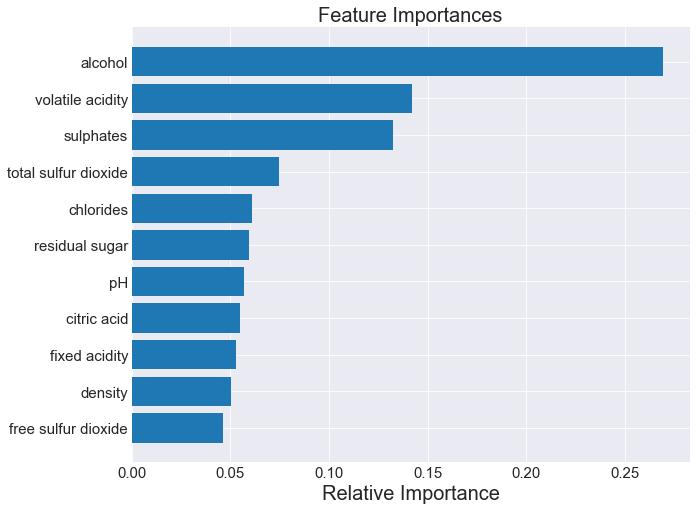

In [25]:
keys = wine_df.columns
values = rf_reg.feature_importances_
var_imp = dict(zip(keys, values))
var_imp = dict(sorted(var_imp.items(), key=lambda x: x[1]))

rcParams["figure.figsize"] = [10, 8]
plt.title('Feature Importances', fontsize=20)
plt.barh(list(var_imp.keys()), list(var_imp.values()))
plt.xlabel('Relative Importance', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()